In [1]:
import numpy as np
from PIL import Image

In [2]:
def process_grayscale_image(image_path, target_size=(16, 16)):
    # Step 1: Load the image and convert to grayscale
    image = Image.open(image_path).convert("L")  # "L" mode converts the image to grayscale
    
    # Step 2: Resize the image
    image_resized = image.resize(target_size, resample=Image.BOX)
    
    # Step 3: Convert the image to a numpy matrix
    image_matrix = np.array(image_resized)
    
    # Step 4: Vectorize the image
    image_vector = image_matrix.flatten()
    
    return image_matrix, image_vector

# Example usage
image_path = 'Square.png'  # Replace with your black-and-white image path
matrix, vector = process_grayscale_image(image_path)

print(f"Grayscale Image Matrix Shape: {matrix.shape}")  # e.g., (960, 960)
print(f"Grayscale Image Vector Length: {len(vector)}")  # e.g., 960*960

# Example usage
image_path = 'triangle.png'  # Replace with your black-and-white image path
matrix_d, vector_d = process_grayscale_image(image_path)


Grayscale Image Matrix Shape: (16, 16)
Grayscale Image Vector Length: 256


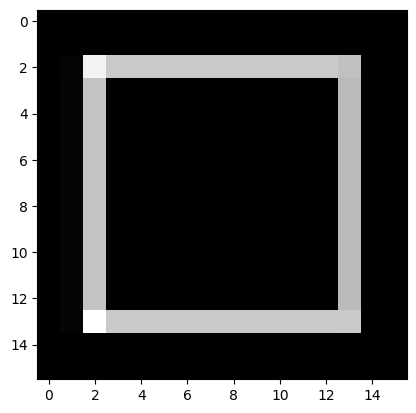

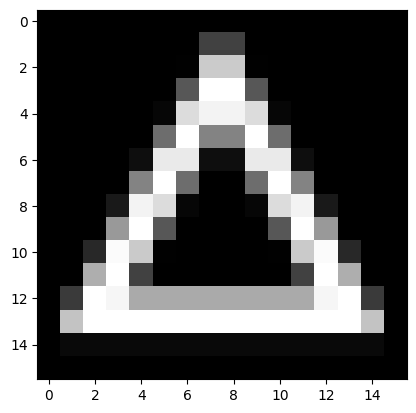

In [3]:
#invert matrix
inverse = np.invert(matrix)

#plot matrix as image
import matplotlib.pyplot as plt
plt.imshow(matrix, cmap='gray')
plt.show()
plt.imshow(matrix_d, cmap='gray')
plt.show()


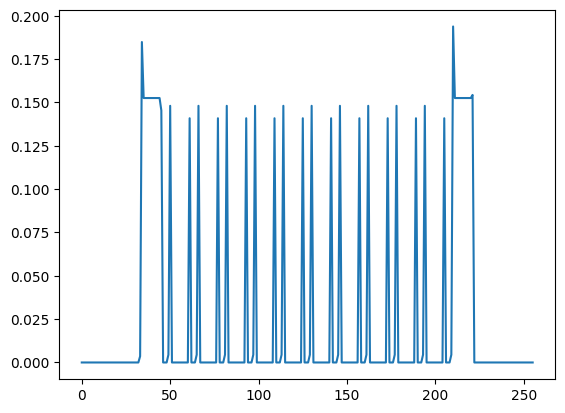

In [4]:
vector
norm_vec = (vector/np.linalg.norm(vector) )
dog_vec = (vector_d/np.linalg.norm(vector_d) )
#plot vector of the cat
plt.plot(norm_vec)    
plt.show()


In [5]:
norm_vec= np.exp(1j*norm_vec)
dog_vec= np.exp(1j*dog_vec)

array([1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 1.        +0.j        ,
       1.        +0.j        , 0.99999356+0.00358928j,
       0.98296418+0.18379722j, 0.98838762+0.15195362j,
       0.9

In [6]:
def gen_base(H, V, dx, dy, wavelength, f):

    """

    gen_base - Function to generate a structured grid (meshgrid) and related parameters.

    Parameters:

        H (int): Number of horizontal grid points (columns).

        V (int): Number of vertical grid points (rows).

        dx (float): Grid spacing in the horizontal direction (x-axis).

        dy (float): Grid spacing in the vertical direction (y-axis).

        wavelength (float): Wavelength of interest (not used directly in this function but passed for flexibility).

        f (float): Focal length (not used directly in this function but passed for flexibility).

    Returns:

        dict: A dictionary containing spatial and frequency domain mesh grids, grid spacings, and polar coordinates.

    """

    # Generate the spatial domain grid points for y (vertical axis)

    y = np.linspace(-(V / 2), (V / 2) - 1, V) * dy  # Scaled by vertical spacing (dy)

    # Generate the spatial domain grid points for x (horizontal axis)

    x = np.linspace(-(H / 2), (H / 2) - 1, H) * dx  # Scaled by horizontal spacing (dx)

    # Generate the frequency domain grid points for fy (vertical frequencies)

    fy =  y/ (wavelength *f)  # Normalized by grid spacing and size np.linspace(-(V / 2), (V / 2) - 1, V)*dy

    # Generate the frequency domain grid points for fx (horizontal frequencies)

    fx = x/ (wavelength * f)  # Normalized by grid spacing and size  np.linspace(-(H / 2), (H / 2) - 1, H)*dx 

    # Create the spatial domain meshgrid (Cartesian coordinates)

    X, Y = np.meshgrid(x, y)

    # Create the frequency domain meshgrid

    FX, FY = np.meshgrid(fx, fy)

    # Convert spatial domain coordinates to polar coordinates

    r = np.sqrt(X**2 + Y**2)  # Radius

    phi = np.arctan2(Y, X)    # Angle in radians

    # Store all grids and parameters in a dictionary

    base = {

        "y": y,      # Vertical grid points

        "x": x,      # Horizontal grid points

        "dx": dx,    # Grid spacing in x

        "dy": dy,    # Grid spacing in y

        "H": H,      # Number of horizontal points

        "V": V,      # Number of vertical points

        "X": X,      # Meshgrid for x-coordinates (spatial domain)

        "Y": Y,      # Meshgrid for y-coordinates (spatial domain)

        "FX": FX,    # Meshgrid for fx-coordinates (frequency domain)

        "FY": FY,    # Meshgrid for fy-coordinates (frequency domain)

        "phi": phi,  # Polar coordinate angles

        "r": r       # Polar coordinate radii

    }


    return base

Mesh = gen_base(16, 16, 8e-6, 8e-6, 633e-9,5.7e-3)
Mesh['FX']*Mesh['X']

array([[1.13522352, 0.86915551, 0.63856323, 0.44344669, 0.28380588,
        0.15964081, 0.07095147, 0.01773787, 0.        , 0.01773787,
        0.07095147, 0.15964081, 0.28380588, 0.44344669, 0.63856323,
        0.86915551],
       [1.13522352, 0.86915551, 0.63856323, 0.44344669, 0.28380588,
        0.15964081, 0.07095147, 0.01773787, 0.        , 0.01773787,
        0.07095147, 0.15964081, 0.28380588, 0.44344669, 0.63856323,
        0.86915551],
       [1.13522352, 0.86915551, 0.63856323, 0.44344669, 0.28380588,
        0.15964081, 0.07095147, 0.01773787, 0.        , 0.01773787,
        0.07095147, 0.15964081, 0.28380588, 0.44344669, 0.63856323,
        0.86915551],
       [1.13522352, 0.86915551, 0.63856323, 0.44344669, 0.28380588,
        0.15964081, 0.07095147, 0.01773787, 0.        , 0.01773787,
        0.07095147, 0.15964081, 0.28380588, 0.44344669, 0.63856323,
        0.86915551],
       [1.13522352, 0.86915551, 0.63856323, 0.44344669, 0.28380588,
        0.15964081, 0.07095147, 

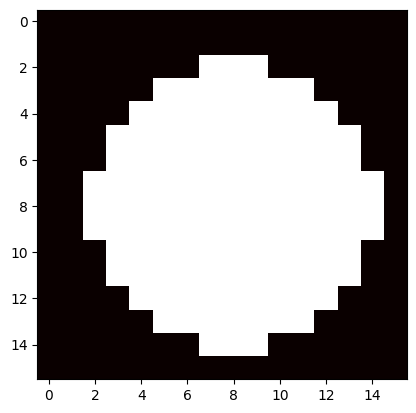

In [28]:

A = np.zeros((16, 16))+0j

A[Mesh['r']<0.5e-4] = 1

#DIsplay as heatmap
plt.imshow(np.abs(A), cmap='hot', interpolation='nearest')
plt.show()


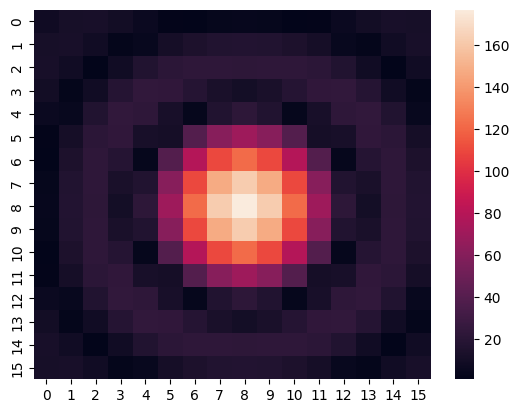

In [8]:
#Matrix Diffraction
ffx = np.exp(-2j * np.pi * Mesh['FX'].T*Mesh['X'])
ffy = np.exp(-2j * np.pi * Mesh['FY'].T*Mesh['Y'])
res = ffx@A@(ffy)

#plot seaborn heatmap
import seaborn as sns
sns.heatmap(np.abs(res))
plt.show()


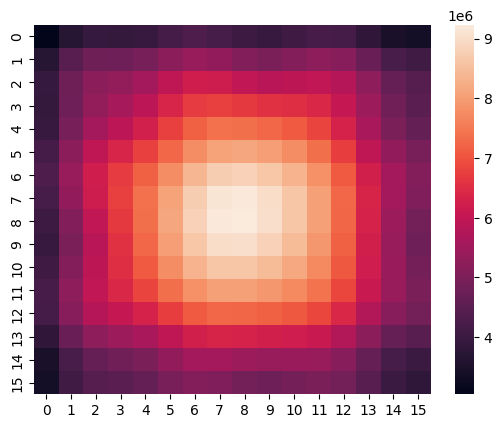

In [9]:
#Vectorized diffraction
#tensor product of the two matrices Fx and Fy
F = np.kron(ffx, ffy)

wavelength = 633e-9
f = 5e-3
Ti=((Mesh['FX']*Mesh['FX'])+(Mesh['FY']*Mesh['FY']))
T=Ti.flatten()
Tf=np.exp(-1j*np.pi*wavelength*f*T)
T=np.diag(Tf)

Li=((Mesh['X']*Mesh['X'])+(Mesh['Y']*Mesh['Y']))
L=Li.flatten()
Lf=np.exp((1j*2*np.pi*L)/(2*f*wavelength))
L=np.diag(Lf)

Pi=F@T@F
Pint=L
P=Pi@L@Pi
np.size(P)

vecA = A.flatten()
res = P@vecA
res = res.reshape(16,16)
sns.heatmap(np.abs(res))
plt.show()


In [10]:
wavelength = 633e-9
f = 5e-3
Ti=((Mesh['FX']*Mesh['FX'])+(Mesh['FY']*Mesh['FY']))
T=Ti.flatten()
Tf=np.exp(-1j*np.pi*wavelength*f*T)
T=np.diag(Tf)

Li=((Mesh['X']*Mesh['X'])+(Mesh['Y']*Mesh['Y']))
L=Li.flatten()
Lf=np.exp((1j*2*np.pi*L)/(2*f*wavelength))
L=np.diag(Lf)

Pi=F@T@F
Pint=L
P=Pi@L@Pi
np.size(P)


65536

Random input theta (first 10 values): [4.97695336 6.05130066 3.38085995 2.97869198 0.22616587 0.96286069
 2.02943877 2.23102453 1.98873788 5.614567  ]
Extrapolated theta (first 10 values): [4.97695336 5.05700276 5.13705217 5.21710158 5.29715098 5.37720039
 5.4572498  5.53729921 5.61734861 5.69739802]
Extrapolated theta (first 10 values): [1.3157553  1.53552073 1.75528616 1.97505159 2.19481703 2.41458246
 2.63434789 2.85411332 3.07387876 3.29364419]
Extrapolated theta (last 10 values): [5.59503643 5.47296424 5.35089204 5.22881984 5.10674765 4.98467545
 4.86260326 4.74053106 4.61845887 4.49638667]
Length of extrapolated theta: 256


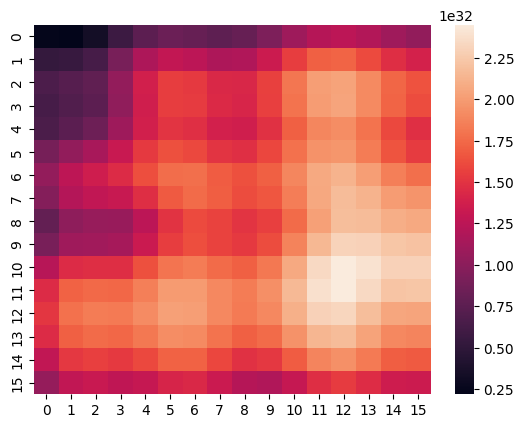

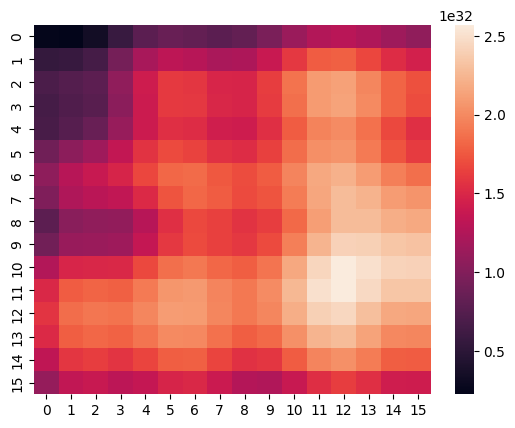

In [11]:

import numpy as np

vec=norm_vec
F = np.kron(ffx, ffy)
def extrapolate_theta_from_20(theta=None):
    """
    Extrapolate a 60-element list of theta values in radians 
    to a list with 3600 elements. If no input theta is provided,
    generate random theta values in radians.
    
    Parameters:
        theta (list or array, optional): A 60-element list or array of theta values in radians.
                                         If None, 60 random values between 0 and 2π are generated.
        
    Returns:
        np.ndarray: A 3600-element list of extrapolated theta values in radians.
    """
    if theta is None:
        # Generate 60 random values between 0 and 2π
        theta = np.random.uniform(0, 2 * np.pi, 20)
    elif len(theta) != 20:
        raise ValueError("Input theta must be a list or array with exactly 60 elements.")
    
    # Original indices for the 60-element list
    X = np.linspace(0, 255, 20)
    
    # New indices for the desired 3600 elements
    X_new = np.arange(256)
    
    # Perform linear interpolation to fill the 3600 values
    theta_new = np.interp(X_new, X, theta)
    
    return theta, theta_new

# Use random theta values
theta_random_1, theta_3600_1 = extrapolate_theta_from_20()
theta_random_2, theta_3600_2 = extrapolate_theta_from_20()
theta_random_3, theta_3600_3 = extrapolate_theta_from_20()
theta_random_4, theta_3600_4 = extrapolate_theta_from_20()
theta_random_5, theta_3600_5 = extrapolate_theta_from_20()

# Check the result
print("Random input theta (first 10 values):", theta_random_1[:10])
print("Extrapolated theta (first 10 values):", theta_3600_1[:10])
print("Extrapolated theta (first 10 values):", theta_3600_2[:10])
print("Extrapolated theta (last 10 values):", theta_3600_1[-10:])
print("Length of extrapolated theta:", len(theta_3600_1))




#initialization of the diagonal matrix
# Diagonal_i = D(np.random.rand(3600))
# res_i = Diagonal_i@res_i

def Optical_layers1(theta_3600_1,theta_3600_2,theta_3600_3,theta_3600_4,theta_3600_5, vec):
    # 2 layered network
    #fourier transform and Diagonal Phase matrix
    #return D(phases[3600:7200])@(F@(D(phases[0:3600])@(F@vec)))  
    D1 = np.diag(np.exp(1j*theta_3600_1))
    D2 = np.diag(np.exp(1j*theta_3600_2))
    D3 = np.diag(np.exp(1j*theta_3600_3))
    D4 = np.diag(np.exp(1j*theta_3600_4))
    D5 = np.diag(np.exp(1j*theta_3600_5))
    #1 layer Network
    return D5@P@D4@P@D3@P@D2@P@D1@(P@vec)

def Optical_layers2(theta_3600_1,theta_3600_2,theta_3600_3,theta_3600_4,theta_3600_5, dog_vec):
    # 2 layered network
    #fourier transform and Diagonal Phase matrix
    #return D(phases[3600:7200])@(F@(D(phases[0:3600])@(F@vec)))  
    D1 = np.diag(np.exp(1j*theta_3600_1))
    D2 = np.diag(np.exp(1j*theta_3600_2))
    D3 = np.diag(np.exp(1j*theta_3600_3))
    D4 = np.diag(np.exp(1j*theta_3600_4))
    D5 = np.diag(np.exp(1j*theta_3600_5))
    #1 layer Network
    return D5@P@D4@P@D3@P@D2@P@D1@(P@dog_vec)

#1 layer network output
res_f_1 = Optical_layers1(theta_3600_1,theta_3600_2,theta_3600_3,theta_3600_4,theta_3600_5, vec.flatten()).reshape(16,16)
res_f_2 = Optical_layers2(theta_3600_1,theta_3600_2,theta_3600_3,theta_3600_4,theta_3600_5, dog_vec.flatten()).reshape(16,16)
sns.heatmap(np.abs(res_f_1))
plt.show()
sns.heatmap(np.abs(res_f_2))
plt.show()

In [12]:
D1 = np.diag(np.exp(1j*theta_3600_1))
D2 = np.diag(np.exp(1j*theta_3600_2))
Im_1=np.abs(D2@P@D1@(P@vec)).reshape(16,16)
len(Im_1)

16

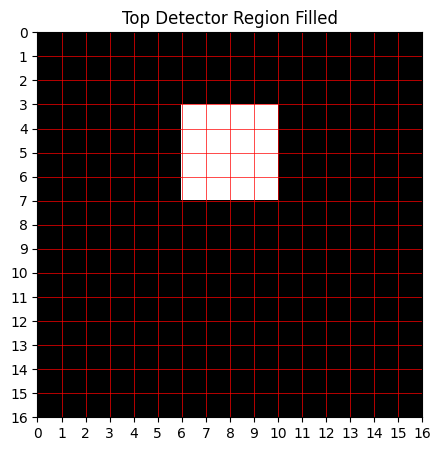

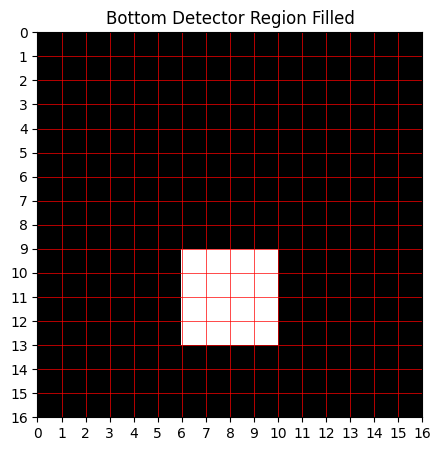

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define image size
image_size = (16, 16)

# Define detector regions (ensuring symmetry)
detector_regions = [
    [3, 7, 6, 10],  # Top center region
    [9, 13, 6, 10],  # Bottom center region
]

# Function to create an image with light in a specified region
def create_region_image(region):
    image = np.zeros(image_size)
    x0, x1, y0, y1 = region
    image[x0:x1, y0:y1] = 1  # Fill the defined region with 1s
    return image

# Generate images
top_filled_image = create_region_image(detector_regions[0])
bottom_filled_image = create_region_image(detector_regions[1])

# Function to plot images with grid overlay
def plot_image_with_grid(image, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray", vmin=0, vmax=1, origin="upper")  # Origin at top-left
    plt.title(title)
    plt.xticks(np.arange(-0.5, 16, 1), labels=np.arange(0, 17, 1))
    plt.yticks(np.arange(-0.5, 16, 1), labels=np.arange(0, 17, 1))
    plt.grid(color='r', linestyle='-', linewidth=0.5)  # Red grid for clarity
    plt.show()

# Plot top-filled image
plot_image_with_grid(top_filled_image, "Top Detector Region Filled")

# Plot bottom-filled image
plot_image_with_grid(bottom_filled_image, "Bottom Detector Region Filled")

In [14]:
import numpy as np

def costfunction(theta_3600_1, theta_3600_2, vec, dog_vec):
    D1 = np.diag(np.exp(1j*theta_3600_1))
    D2 = np.diag(np.exp(1j*theta_3600_2))
    D3 = np.diag(np.exp(1j*theta_3600_3))
    np.abs((D3@P@D2@P@D1@(P@vec.flatten()))).reshape(16, 16)
    np.abs((D3@P@D2@P@D1@(P@dog_vec.flatten()))).reshape(16, 16)
    return (1/256)*(np.abs((np.sum(((((D3@P@D2@P@D1@(P@vec.flatten()))).reshape(16, 16))-top_filled_image)**2+((((D3@P@D2@P@D1@(P@dog_vec.flatten()))).reshape(16, 16))-bottom_filled_image)**2))))


theta_3600_1 = np.random.uniform(0, 2 * np.pi, 256)
theta_3600_2 = np.random.uniform(0, 2 * np.pi, 256)
theta_3600_3 = np.random.uniform(0, 2 * np.pi, 256)
costfunction(theta_3600_1, theta_3600_2, vec, dog_vec)

np.float64(8.6361587933573e+36)

Iteration 500: Cost = 2.3954064347064238e+39
Iteration 1000: Cost = 1.0071463980631806e+40
Iteration 1500: Cost = 1.3049076597942766e+40
Iteration 2000: Cost = 1.3334910793226023e+40
Iteration 2500: Cost = 1.1958821012453245e+40
Iteration 3000: Cost = 1.0671721089167763e+40


KeyboardInterrupt: 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function
def costfunction(theta_3600_1, theta_3600_2, theta_3600_3, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    D3 = np.diag(np.exp(1j * theta_3600_3))

    transformed_vec = np.abs((D3 @ P @ D2 @ P @ D1 @ (P @ vec.flatten()))).reshape(16, 16)
    transformed_dog_vec = np.abs((D3 @ P @ D2 @ P @ D1 @ (P @ dog_vec.flatten()))).reshape(16, 16)

    error_top = (transformed_vec - top_filled_image) ** 2
    error_bottom = (transformed_dog_vec - bottom_filled_image) ** 2

    cost = np.mean(error_top + error_bottom)
    return cost

# Compute gradients
def compute_gradients(theta_3600_1, theta_3600_2, theta_3600_3, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    D3 = np.diag(np.exp(1j * theta_3600_3))

    transformed_vec = np.abs((D3 @ P @ D2 @ P @ D1 @ (P @ vec.flatten()))).reshape(16, 16)
    transformed_dog_vec = np.abs((D3 @ P @ D2 @ P @ D1 @ (P @ dog_vec.flatten()))).reshape(16, 16)

    error_top = (transformed_vec - top_filled_image)
    error_bottom = (transformed_dog_vec - bottom_filled_image)

    grad_theta_1 = np.real(2 * np.imag(D1) @ P.T @ (D2.T @ D3.T @ error_top.flatten() + D2.T @ D3.T @ error_bottom.flatten()))
    grad_theta_2 = np.real(2 * np.imag(D2) @ P.T @ (D1.T @ D3.T @ error_top.flatten() + D1.T @ D3.T @ error_bottom.flatten()))
    grad_theta_3 = np.real(2 * np.imag(D3) @ P.T @ (D1.T @ D2.T @ error_top.flatten() + D1.T @ D2.T @ error_bottom.flatten()))

    return grad_theta_1, grad_theta_2, grad_theta_3

# Adam optimizer
def adam_optimizer(costfunction, theta_3600_1, theta_3600_2, theta_3600_3, vec, dog_vec, P, top_filled_image, bottom_filled_image,
                   learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iters=1000000, tol=1e-6):
    m1, v1 = np.zeros_like(theta_3600_1), np.zeros_like(theta_3600_1)
    m2, v2 = np.zeros_like(theta_3600_2), np.zeros_like(theta_3600_2)
    m3, v3 = np.zeros_like(theta_3600_3), np.zeros_like(theta_3600_3)

    cost_history = []

    for t in range(1, max_iters + 1):
        grad1, grad2, grad3 = compute_gradients(theta_3600_1, theta_3600_2, theta_3600_3, vec, dog_vec, P, top_filled_image, bottom_filled_image)

        # Adam update rule
        for m, v, grad, theta in zip([m1, m2, m3], [v1, v2, v3], [grad1, grad2, grad3], [theta_3600_1, theta_3600_2, theta_3600_3]):
            m[:] = beta1 * m + (1 - beta1) * grad
            v[:] = beta2 * v + (1 - beta2) * (grad ** 2)

            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)

            theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        cost = costfunction(theta_3600_1, theta_3600_2, theta_3600_3, vec, dog_vec, P, top_filled_image, bottom_filled_image)
        cost_history.append(cost)

        if t % 500 == 0:
            print(f"Iteration {t}: Cost = {cost}")

        if cost < tol:
            print(f"Converged in {t} iterations with cost: {cost}")
            break

    return theta_3600_1, theta_3600_2, theta_3600_3, cost_history

# Initialize theta values
theta_3600_1 = np.random.uniform(0, 2 * np.pi, 256)
theta_3600_2 = np.random.uniform(0, 2 * np.pi, 256)
theta_3600_3 = np.random.uniform(0, 2 * np.pi, 256)

# Run optimizer
theta_3600_1_opt, theta_3600_2_opt, theta_3600_3_opt, cost_history = adam_optimizer(
    costfunction, theta_3600_1, theta_3600_2, theta_3600_3, vec, dog_vec, P, top_filled_image, bottom_filled_image
)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()

# Print the optimized values
print(f"Optimized theta_3600_1: {theta_3600_1_opt}")
print(f"Optimized theta_3600_2: {theta_3600_2_opt}")
print(f"Optimized theta_3600_3: {theta_3600_3_opt}")

Iteration 500: Cost = 2.583904029589731e+39
Iteration 1000: Cost = 2.594561383907755e+40
Iteration 1500: Cost = 5.326010912369673e+40
Iteration 2000: Cost = 6.714162138448896e+40
Iteration 2500: Cost = 8.231886329730867e+40
Iteration 3000: Cost = 8.827414860658992e+40
Iteration 3500: Cost = 9.400873575539302e+40
Iteration 4000: Cost = 9.897988380022324e+40
Iteration 4500: Cost = 9.71969972850292e+40
Iteration 5000: Cost = 9.847440517735558e+40
Iteration 5500: Cost = 9.91144543245497e+40
Iteration 6000: Cost = 9.620551191257324e+40
Iteration 6500: Cost = 9.985478234963978e+40
Iteration 7000: Cost = 1.0129609540958567e+41
Iteration 7500: Cost = 1.0201580630939591e+41
Iteration 8000: Cost = 1.023524461258277e+41
Iteration 8500: Cost = 1.0237153784283547e+41
Iteration 9000: Cost = 1.0164757218320677e+41
Iteration 9500: Cost = 1.0180813152075777e+41
Iteration 10000: Cost = 1.0214238552001118e+41
Iteration 10500: Cost = 1.0247951996012182e+41
Iteration 11000: Cost = 1.0245438746772733e+41
It

KeyboardInterrupt: 

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function
def costfunction(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    
    # Apply transformation to vector and dog_vec
    transformed_vec = np.abs(D2 @ P @ D1 @ (P @ vec.flatten())).reshape(16, 16)
    transformed_dog_vec = np.abs(D2 @ P @ D1 @ (P @ dog_vec.flatten())).reshape(16, 16)
    
    # Compute the squared error for both top and bottom images
    error_top = (transformed_vec - top_filled_image) ** 2
    error_bottom = (transformed_dog_vec - bottom_filled_image) ** 2
    
    # Compute the total cost
    cost = np.mean(error_top + error_bottom)
    return cost

# Adam optimizer
def adam_optimizer(costfunction, theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image,
                   learning_rate=0.00001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_epochs=100, tol=1e-6, max_steps_per_epoch=100):
    m1, v1 = np.zeros_like(theta_3600_1), np.zeros_like(theta_3600_1)
    m2, v2 = np.zeros_like(theta_3600_2), np.zeros_like(theta_3600_2)
    
    epoch_costs = []  # To store the cost at the end of each epoch
    
    for epoch in range(1, max_epochs + 1):
        epoch_error = []  # To store errors for each step within an epoch
        
        for step in range(max_steps_per_epoch):  # Loop through steps in each epoch
            # Compute analytical gradients
            grad1, grad2 = compute_gradients(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)
            
            # Update biased first moment estimate
            m1 = beta1 * m1 + (1 - beta1) * grad1
            m2 = beta1 * m2 + (1 - beta1) * grad2
            
            # Update biased second raw moment estimate
            v1 = beta2 * v1 + (1 - beta2) * (grad1 ** 2)
            v2 = beta2 * v2 + (1 - beta2) * (grad2 ** 2)
            
            # Compute bias-corrected moment estimates
            m1_hat = m1 / (1 - beta1 ** (epoch * max_steps_per_epoch + step))
            m2_hat = m2 / (1 - beta1 ** (epoch * max_steps_per_epoch + step))
            v1_hat = v1 / (1 - beta2 ** (epoch * max_steps_per_epoch + step))
            v2_hat = v2 / (1 - beta2 ** (epoch * max_steps_per_epoch + step))
            
            # Update parameters using corrected moments
            theta_3600_1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
            theta_3600_2 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
        
        # Compute cost at the end of the epoch
        cost = costfunction(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)
        epoch_costs.append(cost)
        
        # Check for convergence
        if cost < tol:
            print(f"Converged in epoch {epoch} with cost: {cost}")
            break
        
        if epoch % 10 == 0:  # Print progress every 10 epochs
            print(f"Epoch {epoch}: Cost = {cost}")
    
    return theta_3600_1, theta_3600_2, epoch_costs

# Compute gradients
def compute_gradients(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    
    # Apply transformations to both vectors
    transformed_vec = np.abs(D2 @ P @ D1 @ (P @ vec.flatten())).reshape(16, 16)
    transformed_dog_vec = np.abs(D2 @ P @ D1 @ (P @ dog_vec.flatten())).reshape(16, 16)
    
    # Compute errors
    error_top = (transformed_vec - top_filled_image)
    error_bottom = (transformed_dog_vec - bottom_filled_image)
    
    # Compute gradients
    grad_theta_1 = np.real(2 * np.imag(D1) @ P.T @ (D2.T @ (error_top.flatten() + error_bottom.flatten())))
    grad_theta_2 = np.real(2 * np.imag(D2) @ P.T @ (D1.T @ (error_top.flatten() + error_bottom.flatten())))
    
    return grad_theta_1, grad_theta_2

# Initialize theta values
theta_3600_1 = np.random.uniform(0, 2 * np.pi, 256)
theta_3600_2 = np.random.uniform(0, 2 * np.pi, 256)

# Run optimizer
theta_3600_1_opt, theta_3600_2_opt, epoch_costs = adam_optimizer(
    costfunction, theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image
)

# Plot the cost vs. epoch graph
plt.plot(epoch_costs)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs. Epochs")
plt.show()

# Print the optimized values of theta_3600_1 and theta_3600_2
print(f"Optimized theta_3600_1: {theta_3600_1_opt}")
print(f"Optimized theta_3600_2: {theta_3600_2_opt}")

Epoch 10: Cost = 1.2318521438178885e+26
Epoch 20: Cost = 1.1816831639004733e+26
Epoch 30: Cost = 1.1357016429212245e+26
Epoch 40: Cost = 1.0936659760500315e+26
Epoch 50: Cost = 1.0550482135228864e+26


KeyboardInterrupt: 

Epoch 10: Cost = 1.8269825252726656e+23
Epoch 20: Cost = 2.50773539900008e+23
Epoch 30: Cost = 3.400282634616183e+23
Epoch 40: Cost = 4.4315388781122984e+23
Epoch 50: Cost = 5.449578694010274e+23
Epoch 60: Cost = 6.448350781779648e+23
Epoch 70: Cost = 7.507241568756148e+23
Epoch 80: Cost = 8.57647333679577e+23
Epoch 90: Cost = 9.633823314636118e+23
Epoch 100: Cost = 1.0758641207970058e+24


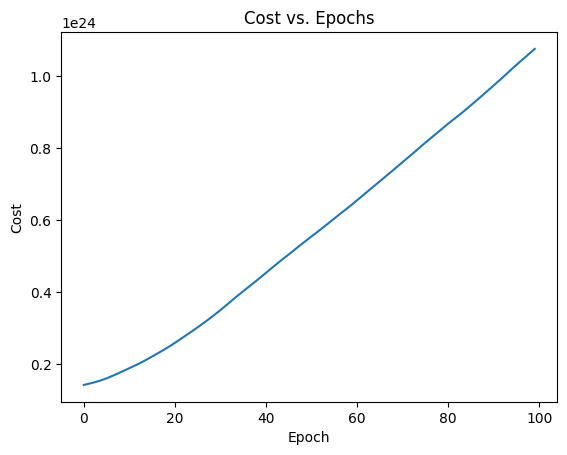

Optimized theta_3600_1: [ 6.36789174e-01  5.11161423e+00  4.04268249e+00  5.13720203e+00
  3.89112037e+00  3.14161276e+00  3.08755215e+00  3.24717682e+00
  4.76912255e+00  3.70356007e+00  3.14158573e+00  5.22001706e+00
  4.96723263e+00  3.14159300e+00  2.04619868e+00  3.14157212e+00
  1.91691077e+00  2.09732422e+00  6.84093320e+00  5.76014039e+00
  6.28317606e+00  5.43835267e-01  5.47686129e+00  6.28319285e+00
  5.09851142e+00  5.47864544e+00  2.48378647e+00  7.68655670e-01
  3.14158858e+00  3.14160550e+00  3.14158720e+00  3.60051904e+00
  2.59140050e+00  3.02263080e+00  2.28347829e+00  6.66083251e-01
  5.07825075e+00  1.13952128e+00  6.28316175e+00  6.25644322e+00
  7.81943516e-01  6.29196634e-01  4.42557675e+00 -1.10336753e-05
  4.93112235e+00  3.83071984e+00  3.14161229e+00  1.71870875e+00
  2.75104730e+00  5.31847190e+00  2.69169427e+00 -7.34153898e-06
  6.28320742e+00  5.43141429e+00  5.48201165e+00  5.00360661e+00
  4.31588217e+00  7.98404188e-01  6.28320280e+00  4.79051096e+00
 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function
def costfunction(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    
    # Apply transformation to vector and dog_vec
    transformed_vec = np.abs(D2 @ P @ D1 @ (P @ vec.flatten())).reshape(16, 16)
    transformed_dog_vec = np.abs(D2 @ P @ D1 @ (P @ dog_vec.flatten())).reshape(16, 16)
    
    # Compute the squared error for both top and bottom images
    error_top = (transformed_vec - top_filled_image) ** 2
    error_bottom = (transformed_dog_vec - bottom_filled_image) ** 2
    
    # Compute the total cost
    cost = np.mean(error_top + error_bottom)
    return cost

# Adam optimizer
def adam_optimizer(costfunction, theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image,
                   learning_rate=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_epochs=100, tol=1e-6, max_steps_per_epoch=100, grad_clip=5.0):
    m1, v1 = np.zeros_like(theta_3600_1), np.zeros_like(theta_3600_1)
    m2, v2 = np.zeros_like(theta_3600_2), np.zeros_like(theta_3600_2)
    
    epoch_costs = []  # To store the cost at the end of each epoch
    
    for epoch in range(1, max_epochs + 1):
        epoch_error = []  # To store errors for each step within an epoch
        
        for step in range(max_steps_per_epoch):  # Loop through steps in each epoch
            # Compute analytical gradients
            grad1, grad2 = compute_gradients(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)
            
            # Clip gradients to avoid explosion
            grad1 = np.clip(grad1, -grad_clip, grad_clip)
            grad2 = np.clip(grad2, -grad_clip, grad_clip)
            
            # Update biased first moment estimate
            m1 = beta1 * m1 + (1 - beta1) * grad1
            m2 = beta1 * m2 + (1 - beta1) * grad2
            
            # Update biased second raw moment estimate
            v1 = beta2 * v1 + (1 - beta2) * (grad1 ** 2)
            v2 = beta2 * v2 + (1 - beta2) * (grad2 ** 2)
            
            # Compute bias-corrected moment estimates
            m1_hat = m1 / (1 - beta1 ** (epoch * max_steps_per_epoch + step))
            m2_hat = m2 / (1 - beta1 ** (epoch * max_steps_per_epoch + step))
            v1_hat = v1 / (1 - beta2 ** (epoch * max_steps_per_epoch + step))
            v2_hat = v2 / (1 - beta2 ** (epoch * max_steps_per_epoch + step))
            
            # Update parameters using corrected moments
            theta_3600_1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
            theta_3600_2 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
        
        # Compute cost at the end of the epoch
        cost = costfunction(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)
        epoch_costs.append(cost)
        
        # Check for convergence
        if cost < tol:
            print(f"Converged in epoch {epoch} with cost: {cost}")
            break
        
        if epoch % 10 == 0:  # Print progress every 10 epochs
            print(f"Epoch {epoch}: Cost = {cost}")
    
    return theta_3600_1, theta_3600_2, epoch_costs

# Compute gradients
def compute_gradients(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    
    # Apply transformations to both vectors
    transformed_vec = np.abs(D2 @ P @ D1 @ (P @ vec.flatten())).reshape(16, 16)
    transformed_dog_vec = np.abs(D2 @ P @ D1 @ (P @ dog_vec.flatten())).reshape(16, 16)
    
    # Compute errors
    error_top = (transformed_vec - top_filled_image)
    error_bottom = (transformed_dog_vec - bottom_filled_image)
    
    # Compute gradients
    grad_theta_1 = np.real(2 * np.imag(D1) @ P.T @ (D2.T @ (error_top.flatten() + error_bottom.flatten())))
    grad_theta_2 = np.real(2 * np.imag(D2) @ P.T @ (D1.T @ (error_top.flatten() + error_bottom.flatten())))
    
    return grad_theta_1, grad_theta_2

# Initialize theta values
theta_3600_1 = np.random.uniform(0, 2 * np.pi, 256)
theta_3600_2 = np.random.uniform(0, 2 * np.pi, 256)

# Run optimizer
theta_3600_1_opt, theta_3600_2_opt, epoch_costs = adam_optimizer(
    costfunction, theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image
)

# Plot the cost vs. epoch graph
plt.plot(epoch_costs)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs. Epochs")
plt.show()

# Print the optimized values of theta_3600_1 and theta_3600_2
print(f"Optimized theta_3600_1: {theta_3600_1_opt}")
print(f"Optimized theta_3600_2: {theta_3600_2_opt}")

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Cost function
def costfunction(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    
    # Apply transformation to vector and dog_vec
    transformed_vec = np.abs(D2 @ P @ D1 @ (P @ vec.flatten())).reshape(16, 16)
    transformed_dog_vec = np.abs(D2 @ P @ D1 @ (P @ dog_vec.flatten())).reshape(16, 16)
    
    # Compute the squared error for both top and bottom images
    error_top = (transformed_vec - top_filled_image) ** 2
    error_bottom = (transformed_dog_vec - bottom_filled_image) ** 2
    
    # Compute the total cost
    cost = np.mean(error_top + error_bottom)
    return cost

# Adam optimizer
def adam_optimizer(costfunction, theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image,
                   learning_rate=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_epochs=100, tol=1e-6, max_steps_per_epoch=100, grad_clip=5.0):
    m1, v1 = np.zeros_like(theta_3600_1), np.zeros_like(theta_3600_1)
    m2, v2 = np.zeros_like(theta_3600_2), np.zeros_like(theta_3600_2)
    
    epoch_costs = []  # To store the cost at the end of each epoch
    
    for epoch in range(1, max_epochs + 1):
        epoch_error = []  # To store errors for each step within an epoch
        
        for step in range(max_steps_per_epoch):  # Loop through steps in each epoch
            # Compute analytical gradients
            grad1, grad2 = compute_gradients(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)
            
            # Clip gradients to avoid explosion
            grad1 = np.clip(grad1, -grad_clip, grad_clip)
            grad2 = np.clip(grad2, -grad_clip, grad_clip)
            
            # Update biased first moment estimate
            m1 = beta1 * m1 + (1 - beta1) * grad1
            m2 = beta1 * m2 + (1 - beta1) * grad2
            
            # Update biased second raw moment estimate
            v1 = beta2 * v1 + (1 - beta2) * (grad1 ** 2)
            v2 = beta2 * v2 + (1 - beta2) * (grad2 ** 2)
            
            # Compute bias-corrected moment estimates
            m1_hat = m1 / (1 - beta1 ** (epoch * max_steps_per_epoch + step))
            m2_hat = m2 / (1 - beta1 ** (epoch * max_steps_per_epoch + step))
            v1_hat = v1 / (1 - beta2 ** (epoch * max_steps_per_epoch + step))
            v2_hat = v2 / (1 - beta2 ** (epoch * max_steps_per_epoch + step))
            
            # Update parameters using corrected moments
            theta_3600_1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
            theta_3600_2 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
        
        # Compute cost at the end of the epoch
        cost = costfunction(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)
        epoch_costs.append(cost)
        
        # Check for convergence
        if cost < tol:
            print(f"Converged in epoch {epoch} with cost: {cost}")
            break
        
        if epoch % 10 == 0:  # Print progress every 10 epochs
            print(f"Epoch {epoch}: Cost = {cost}")
    
    return theta_3600_1, theta_3600_2, epoch_costs

# Compute gradients
def compute_gradients(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    
    # Apply transformations to both vectors
    transformed_vec = np.abs(D2 @ P @ D1 @ (P @ vec.flatten())).reshape(16, 16)
    transformed_dog_vec = np.abs(D2 @ P @ D1 @ (P @ dog_vec.flatten())).reshape(16, 16)
    
    # Compute errors
    error_top = (transformed_vec - top_filled_image)
    error_bottom = (transformed_dog_vec - bottom_filled_image)
    
    # Compute gradients
    grad_theta_1 = np.real(2 * np.imag(D1) @ P.T @ (D2.T @ (error_top.flatten() + error_bottom.flatten())))
    grad_theta_2 = np.real(2 * np.imag(D2) @ P.T @ (D1.T @ (error_top.flatten() + error_bottom.flatten())))
    
    return grad_theta_1, grad_theta_2

# Initialize theta values
theta_3600_1 = np.random.uniform(0, 2 * np.pi, 256)
theta_3600_2 = np.random.uniform(0, 2 * np.pi, 256)
# Run optimizer
theta_3600_1_opt, theta_3600_2_opt, epoch_costs = adam_optimizer(
    costfunction, theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image
)

# Plot the cost vs. epoch graph
plt.plot(epoch_costs)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs. Epochs")
plt.show()

# Print the optimized values of theta_3600_1 and theta_3600_2
print(f"Optimized theta_3600_1: {theta_3600_1_opt}")
print(f"Optimized theta_3600_2: {theta_3600_2_opt}")

Epoch 10: Cost = 1.7175595876054047e+23
Epoch 20: Cost = 2.0392621054471175e+23
Epoch 30: Cost = 2.5579113916485686e+23
Epoch 40: Cost = 3.260493004425044e+23
Epoch 50: Cost = 4.179088658546161e+23


KeyboardInterrupt: 

In [90]:
import numpy as np

# Cost function
def costfunction(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    
    # Apply transformation to vector and dog_vec
    transformed_vec = np.abs(D2 @ P @ D1 @ (P @ vec.flatten())).reshape(16, 16)
    transformed_dog_vec = np.abs(D2 @ P @ D1 @ (P @ dog_vec.flatten())).reshape(16, 16)
    
    # Compute the squared error for both top and bottom images
    error_top = (transformed_vec - top_filled_image) ** 2
    error_bottom = (transformed_dog_vec - bottom_filled_image) ** 2
    
    # Compute the total cost
    cost = np.mean(error_top + error_bottom)
    return cost

# Adam optimizer
def adam_optimizer(costfunction, theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image,
                   learning_rate=0.00001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iters=100000, tol=1e-6):
    m1, v1 = np.zeros_like(theta_3600_1), np.zeros_like(theta_3600_1)
    m2, v2 = np.zeros_like(theta_3600_2), np.zeros_like(theta_3600_2)
    
    for t in range(1, max_iters + 1):
        # Compute analytical gradients
        grad1, grad2 = compute_gradients(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)
        
        # Update biased first moment estimate
        m1 = beta1 * m1 + (1 - beta1) * grad1
        m2 = beta1 * m2 + (1 - beta1) * grad2
        
        # Update biased second raw moment estimate
        v1 = beta2 * v1 + (1 - beta2) * (grad1 ** 2)
        v2 = beta2 * v2 + (1 - beta2) * (grad2 ** 2)
        
        # Compute bias-corrected moment estimates
        m1_hat = m1 / (1 - beta1 ** t)
        m2_hat = m2 / (1 - beta1 ** t)
        v1_hat = v1 / (1 - beta2 ** t)
        v2_hat = v2 / (1 - beta2 ** t)
        
        # Update parameters using corrected moments
        theta_3600_1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
        theta_3600_2 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
        
        # Compute cost to check convergence
        cost = costfunction(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)
        if cost < tol:
            print(f"Converged in {t} iterations with cost: {cost}")
            break
        
        if t % 500 == 0:
            print(f"Iteration {t}: Cost = {cost}")
    
    return theta_3600_1, theta_3600_2

# Compute gradients
def compute_gradients(theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image):
    D1 = np.diag(np.exp(1j * theta_3600_1))
    D2 = np.diag(np.exp(1j * theta_3600_2))
    
    # Apply transformations to both vectors
    transformed_vec = np.abs(D2 @ P @ D1 @ (P @ vec.flatten())).reshape(16, 16)
    transformed_dog_vec = np.abs(D2 @ P @ D1 @ (P @ dog_vec.flatten())).reshape(16, 16)
    
    # Compute errors
    error_top = (transformed_vec - top_filled_image)
    error_bottom = (transformed_dog_vec - bottom_filled_image)
    
    # Compute gradients
    grad_theta_1 = np.real(2 * np.imag(D1) @ P.T @ (D2.T @ (error_top.flatten() + error_bottom.flatten())))
    grad_theta_2 = np.real(2 * np.imag(D2) @ P.T @ (D1.T @ (error_top.flatten() + error_bottom.flatten())))
    
    return grad_theta_1, grad_theta_2

# Initialize theta values
theta_3600_1 = np.random.uniform(0, 2 * np.pi, 256)
theta_3600_2 = np.random.uniform(0, 2 * np.pi, 256)

# Run optimizer
theta_3600_1_opt, theta_3600_2_opt = adam_optimizer(costfunction, theta_3600_1, theta_3600_2, vec, dog_vec, P, top_filled_image, bottom_filled_image)


Iteration 500: Cost = 120743.96663156751
Iteration 1000: Cost = 120700.01065673189
Iteration 1500: Cost = 120649.54855923893
Iteration 2000: Cost = 120595.66750606551
Iteration 2500: Cost = 120540.26160391502
Iteration 3000: Cost = 120484.1514856307
Iteration 3500: Cost = 120427.72581747455
Iteration 4000: Cost = 120370.92235770519
Iteration 4500: Cost = 120313.68633472479
Iteration 5000: Cost = 120256.09971488104
Iteration 5500: Cost = 120198.39204737532
Iteration 6000: Cost = 120140.89505330994
Iteration 6500: Cost = 120083.84762570672
Iteration 7000: Cost = 120026.86946242437
Iteration 7500: Cost = 119968.73948370403
Iteration 8000: Cost = 119907.97144873036
Iteration 8500: Cost = 119844.32584428124
Iteration 9000: Cost = 119779.45438776135
Iteration 9500: Cost = 119714.6365614402
Iteration 10000: Cost = 119650.46443383614
Iteration 10500: Cost = 119587.26157385446
Iteration 11000: Cost = 119524.57933600244
Iteration 11500: Cost = 119444.71424958835
Iteration 12000: Cost = 119369.47

KeyboardInterrupt: 

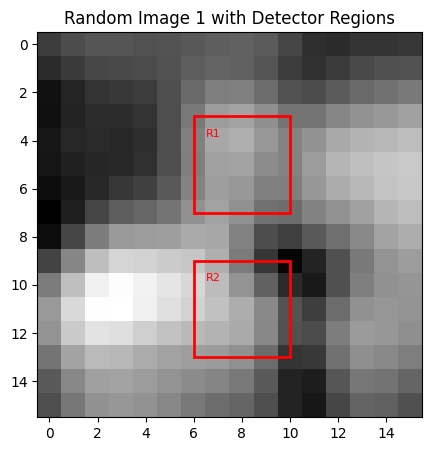

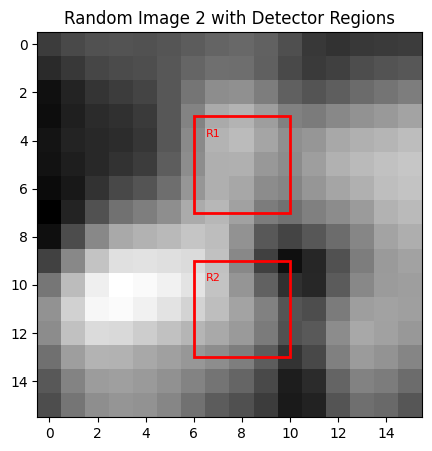

Light Ratios for Image 1: [0.0745308 0.0802078]
Light Ratios for Image 2: [0.07863694 0.0792064 ]


In [21]:
import numpy as np
import matplotlib.pyplot as plt


# Define the phase shift matrices (example matrices for demonstration)
D1 = np.diag(np.exp(1j * theta_3600_1))
D2 = np.diag(np.exp(1j * theta_3600_2))

# Define the size of the image and regions
image_size = (16, 16)
vertical_shift = -2  # Shift regions upward by 2 pixels
original_detector_regions = [
    [3, 7, 6, 10],  # Top center region
    [9, 13, 6, 10],  # Bottom center region
]

# Function to map region coordinates into the image
def get_range(region):
    x0, x1, y0, y1 = region
    return x0, x1, y0, y1

# Function to calculate light in the region and compare it to the total image light
def calculate_light(image, region):
    # Total light in the image
    total_light = np.sum(image)
    
    # Extract the region
    x0, x1, y0, y1 = get_range(region)
    region_light = np.sum(image[x0:x1, y0:y1])
    
    # Ratio of region light to total light
    light_ratio = region_light / total_light if total_light > 0 else 0
    return light_ratio

# Generate two random grayscale images
np.random.seed(42)  # For reproducibility
vec = np.random.rand(16, 16)
dog_vec = np.random.rand(16, 16)
random_images = [
    np.abs((D2 @ P @ D1 @ (P @ vec.flatten()))).reshape(16, 16),  # First random image
    np.abs((D2 @ P @ D1 @ (P @ dog_vec.flatten()))).reshape(16, 16),  # Second random image
]

# Initialize separate arrays for light ratios for each image
light_ratios_image_1 = []
light_ratios_image_2 = []

# Process each image
for img_idx, random_image in enumerate(random_images):
    light_ratios = []
    
    # Calculate light ratios for all regions in the current image
    for region in detector_regions:
        light_ratio = calculate_light(random_image, region)
        light_ratios.append(light_ratio)
    
    # Store results in respective arrays
    if img_idx == 0:
        light_ratios_image_1 = np.array(light_ratios)
    elif img_idx == 1:
        light_ratios_image_2 = np.array(light_ratios)
    
    # Visualize the current image and overlay the regions
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(random_image, cmap="gray")
    ax.set_title(f"Random Image {img_idx + 1} with Detector Regions")
    
    # Overlay rectangles for the detector regions
    for i, region in enumerate(detector_regions):
        x0, x1, y0, y1 = get_range(region)
        rect = plt.Rectangle(
            (y0, x0), y1 - y0, x1 - x0, linewidth=2, edgecolor="red", facecolor="none"
        )
        ax.add_patch(rect)
        ax.text(
            y0 + 0.5,
            x0 + 0.5,
            f"R{i + 1}",
            color="red",
            fontsize=8,
            verticalalignment="top",
        )
    plt.show()

# Print results
print("Light Ratios for Image 1:", light_ratios_image_1)
print("Light Ratios for Image 2:", light_ratios_image_2)

In [22]:
import numpy as np



# Define the size of the image and regions
image_size = (16, 16)
original_detector_regions = [
    [3, 7, 6, 10],  # Top center region
    [9, 13, 6, 10],  # Bottom center region
]



# Function to calculate light ratios for a single image
def calculate_light_ratios(theta_3600_1, theta_3600_2, vec):
    """
    Calculate light ratios for the given image and predefined detector regions.

    Parameters:
    - theta_3600_1: Phase angles for the first diagonal matrix (size 3600).
    - theta_3600_2: Phase angles for the second diagonal matrix (size 3600).
    - vec: Input vector to be transformed (size 3600).

    Returns:
    - A numpy array containing light ratios for each region.
    """
    # Generate diagonal matrices
    D1 = np.diag(np.exp(1j*theta_3600_1))
    D2 = np.diag(np.exp(1j*theta_3600_2))
    # D3 = np.diag(np.exp(1j*theta_3600_3))
    # D4 = np.diag(np.exp(1j*theta_3600_4))
    # D5 = np.diag(np.exp(1j*theta_3600_5))
    # Perform matrix operations
    image = np.abs((D2@P@D1@(P@ vec.flatten()))).reshape(16, 16)

    # Total light in the image
    total_light = np.sum(image)
    if total_light == 0:
        raise ValueError("The total light in the image is zero; cannot compute ratios.")

    # Calculate light ratios for the detector regions
    light_ratios = []
    for region in detector_regions:
        x0, x1, y0, y1 = region
        region_light = np.sum(image[x0:x1, y0:y1])
        light_ratios.append(region_light / total_light)
    
    return np.array(light_ratios)

theta_random_1, theta_3600_1 = extrapolate_theta_from_20()
theta_random_2, theta_3600_2 = extrapolate_theta_from_20()
# theta_random_3, theta_3600_3 = extrapolate_theta_from_20()
# theta_random_4, theta_3600_4 = extrapolate_theta_from_20()
# theta_random_5, theta_3600_5 = extrapolate_theta_from_20()

# Calculate light ratios for the image D5@F@D4@F@D3@F@ ,theta_3600_3, theta_3600_4, theta_3600_5,
light_ratios = calculate_light_ratios(theta_3600_1, theta_3600_2, vec)

# Display the light ratios
print("Light Ratios for the image:", light_ratios)

Light Ratios for the image: [0.09538773 0.04783105]


In [23]:
costfunction = (1/2)*((calculate_light_ratios(theta_3600_1, theta_3600_2, vec)-np.array([1,0]))**2+(calculate_light_ratios(theta_3600_1, theta_3600_2, dog_vec)-np.array([0,1]))**2)
costfunction

array([0.41365399, 0.45667193])

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted cost function for 256 phase screens and 16x16 images
def cost_function(theta_3600_1, theta_3600_2, vec, dog_vec):
    """
    Calculate the cost function value based on light ratios.
    Returns a vector indicating deviation from the target.
    """
    ratios_1 = calculate_light_ratios(theta_3600_1, theta_3600_2, vec)
    ratios_2 = calculate_light_ratios(theta_3600_1, theta_3600_2, dog_vec)
    return (np.mean(((ratios_1 - np.array([1, 0]))**2) + (ratios_2 - np.array([0, 1])**2)))

# Random walk optimization for 256 phase screens
def random_walk_optimization(
    vec, dog_vec, F, max_steps=1000, step_size=0.4, eps=[5e-4, 1e-6], phase_screen_size=256
):
    # Initialize phase screen angles (retaining original names)
    _, theta_3600_1 = extrapolate_theta_from_20()
    _, theta_3600_2 = extrapolate_theta_from_20()

    # Optimization variables
    coeff = np.zeros(phase_screen_size)
    delta = np.zeros_like(coeff)
    step_modulator = 0
    resets = 0
    new_step = True

    # Initial cost
    error_vector = cost_function(theta_3600_1, theta_3600_2, vec, dog_vec)
    error_norm = np.linalg.norm(error_vector)
    best_error = error_norm
    plot_points = []

    for step_counter in range(max_steps):
        # Modulate step size
        alpha = step_size / ((step_modulator + 1) ** 0.602)

        # Generate a new random step if needed
        if new_step:
            delta = np.random.choice([-1, 1], size=phase_screen_size)
            coeff_step = coeff + alpha * delta

        # Calculate new error
        step_modulator += 1
        new_error_vector = cost_function(theta_3600_1, theta_3600_2, vec, dog_vec)
        new_error_norm = np.linalg.norm(new_error_vector)

        # Check for improvement
        if new_error_norm < error_norm or step_modulator == 1:
            error_vector = new_error_vector
            error_norm = new_error_norm
            coeff = coeff_step

            # Update global best
            if error_norm < best_error:
                best_error = error_norm
                best_coeff = coeff.copy()

            new_step = False  # Continue in the same direction

        else:
            # Reset search if needed
            if step_modulator >= 41 and np.std(plot_points[-40:]) <= eps[1]:
                step_modulator = 0
                resets += 1
                new_step = True

        # Record the error norm
        plot_points.append(error_norm)

        # Stop if error is within the desired range
        if np.all(new_error_vector <= np.array([0.15, 0.15])):
            print(f"Converged within acceptable range in {step_counter} steps.")
            break

    else:
        print(f"Max steps reached ({max_steps}). Final error: {best_error}.")

    return coeff, best_error, plot_points, theta_3600_1, theta_3600_2

# Function to check final light ratios
def print_final_light_ratios(theta_3600_1, theta_3600_2, vec, dog_vec):
    final_ratios_1 = calculate_light_ratios(theta_3600_1, theta_3600_2, vec)
    final_ratios_2 = calculate_light_ratios(theta_3600_1, theta_3600_2, dog_vec)
    print("Final Light Ratios (vec):", final_ratios_1)
    print("Final Light Ratios (dog_vec):", final_ratios_2)

# Execute the optimization
phase_screen_size = 256  # Adjusted size for 16x16 images
coeff, final_error, plot_points, theta_3600_1, theta_3600_2 = random_walk_optimization(vec, dog_vec, F, phase_screen_size=phase_screen_size)

# Display results
print("Optimized Coefficients (first 5):", coeff[:5])
print("Final Error:", final_error)





Converged within acceptable range in 0 steps.
Optimized Coefficients (first 5): [ 0.4  0.4  0.4 -0.4 -0.4]
Final Error: 0.0314356687625455


In [25]:
import numpy as np

# Adjusted cost function for 256 phase screens and 16x16 images
def cost_function(theta_3600_1, theta_3600_2, vec, dog_vec):
    """
    Calculate the cost function value based on light ratios.
    Returns a vector indicating deviation from the target.
    """
    ratios_1 = calculate_light_ratios(theta_3600_1, theta_3600_2, vec)
    ratios_2 = calculate_light_ratios(theta_3600_1, theta_3600_2, dog_vec)
    return np.mean((ratios_1 - np.array([1, 0]))**2 + (ratios_2 - np.array([0, 1]))**2)


# Random walk optimization for 256 phase screens
def random_walk_optimization(
    vec, dog_vec, F, max_steps=1000, step_size=0.4, eps=[5e-4, 1e-6], phase_screen_size=256
):
    # Initialize phase screen angles (retaining original names)
    _, theta_3600_1 = extrapolate_theta_from_20()
    _, theta_3600_2 = extrapolate_theta_from_20()

    # Optimization variables
    coeff = np.zeros(phase_screen_size)
    delta = np.zeros_like(coeff)
    step_modulator = 0
    resets = 0
    new_step = True

    # Initial cost
    error_vector = cost_function(theta_3600_1, theta_3600_2, vec, dog_vec)
    error_norm = np.linalg.norm(error_vector)
    best_error = error_norm
    theta_3600_1_opt, theta_3600_2_opt = theta_3600_1.copy(), theta_3600_2.copy()
    plot_points = []

    for step_counter in range(max_steps):
        # Modulate step size
        alpha = step_size / ((step_modulator + 1) ** 0.602)

        # Generate a new random step if needed
        if new_step:
            delta = np.random.choice([-1, 1], size=phase_screen_size)
            coeff_step = coeff + alpha * delta

        # Calculate new error
        step_modulator += 1
        new_error_vector = cost_function(theta_3600_1, theta_3600_2, vec, dog_vec)
        new_error_norm = np.linalg.norm(new_error_vector)

        # Check for improvement
        if new_error_norm < error_norm or step_modulator == 1:
            error_vector = new_error_vector
            error_norm = new_error_norm
            coeff = coeff_step

            # Update global best
            if error_norm < best_error:
                best_error = error_norm
                theta_3600_1_opt, theta_3600_2_opt = theta_3600_1.copy(), theta_3600_2.copy()

            new_step = False  # Continue in the same direction

        else:
            # Reset search if needed
            if step_modulator >= 41 and np.std(plot_points[-40:]) <= eps[1]:
                step_modulator = 0
                resets += 1
                new_step = True

        # Record the error norm
        plot_points.append(error_norm)

        # Stop if error is within the desired range
        if np.all(new_error_vector <= np.array([0.15, 0.15])):
            print(f"Converged within acceptable range in {step_counter} steps.")
            break

    else:
        print(f"Max steps reached ({max_steps}). Final error: {best_error}.")

    return theta_3600_1_opt, theta_3600_2_opt


# Example Usage
theta_3600_1_opt, theta_3600_2_opt = random_walk_optimization(vec, dog_vec, F)

# Output optimized phase screens
theta_3600_1_opt, theta_3600_2_opt

# Calculate light ratios for the image D5@F@D4@F@D3@F@ ,theta_3600_3, theta_3600_4, theta_3600_5,
light_ratios_opt_1 = calculate_light_ratios(theta_3600_1_opt, theta_3600_2_opt, vec)
light_ratios_opt_2 = calculate_light_ratios(theta_3600_1_opt, theta_3600_2_opt, dog_vec)

light_ratios_opt_1

# Display results
print("Optimized Coefficients (first 5):", light_ratios)
print("Final Error:", light_ratios_opt_1)


Max steps reached (1000). Final error: 0.9315456351262903.
Optimized Coefficients (first 5): [0.09538773 0.04783105]
Final Error: [0.04136734 0.0236016 ]


In [27]:
import numpy as np
import matplotlib.pyplot as plt


# Define the cost function (returns scalar error)
def cost_function(theta_3600_1, theta_3600_2, vec, dog_vec):
    ratios_1 = calculate_light_ratios(theta_3600_1, theta_3600_2, vec)
    ratios_2 = calculate_light_ratios(theta_3600_1, theta_3600_2, dog_vec)
    
    # Target arrays
    target_1 = np.array([1, 0])
    target_2 = np.array([0, 1])
    
    # Compute element-wise squared differences and sum them
    error_1 = np.sum((ratios_1 - target_1) ** 2)
    error_2 = np.sum((ratios_2 - target_2) ** 2)
    
    # Return the total scalar error
    return 0.25 * (error_1 + error_2)


# Adam Optimizer with independent random initialization
def adam_optimizer(vec, dog_vec, max_steps=10000, initial_learning_rate=1e-3, beta_1=0.9, beta_2=0.999, eps=1e-8, phase_screen_size=3600):
    # Randomly initialize theta values independently
    theta_3600_1 = np.random.uniform(0, 2 * np.pi, 256)
    theta_3600_2 = np.random.uniform(0, 2 * np.pi, 256)

    # Initialize Adam variables
    m_1, m_2 = 0, 0  # First moment estimate
    v_1, v_2 = 0, 0  # Second moment estimate
    t = 0  # Time step

    # Error tracking
    error_best = np.inf
    error = [1, 1]
    plot_points = []  # For tracking errors

    # Learning rate warmup (increase the learning rate in the first few iterations)
    warmup_steps = 200  # Increased warmup for the first 200 steps
    learning_rate = initial_learning_rate

    for step_counter in range(max_steps):
        # Increment time step
        t += 1

        # Gradually increase learning rate during warmup phase
        if t <= warmup_steps:
            learning_rate = initial_learning_rate * (t / warmup_steps)  # Linearly increase learning rate

        # Compute gradients for theta_3600_1 and theta_3600_2
        grad_3600_1, grad_3600_2 = estimate_gradient(cost_function, theta_3600_1, theta_3600_2, vec, dog_vec)

        # Apply gradient clipping to prevent large gradients
        grad_3600_1 = np.clip(grad_3600_1, -5, 5)
        grad_3600_2 = np.clip(grad_3600_2, -5, 5)

        # Update first moment estimate (m) and second moment estimate (v)
        m_1 = beta_1 * m_1 + (1 - beta_1) * grad_3600_1
        m_2 = beta_1 * m_2 + (1 - beta_1) * grad_3600_2
        v_1 = beta_2 * v_1 + (1 - beta_2) * grad_3600_1**2
        v_2 = beta_2 * v_2 + (1 - beta_2) * grad_3600_2**2

        # Bias correction (to ensure more accurate early estimates)
        m_1_hat = m_1 / (1 - beta_1**t)
        m_2_hat = m_2 / (1 - beta_1**t)
        v_1_hat = v_1 / (1 - beta_2**t)
        v_2_hat = v_2 / (1 - beta_2**t)

        # Update parameters (theta)
        theta_3600_1 -= learning_rate * m_1_hat / (np.sqrt(v_1_hat) + eps)
        theta_3600_2 -= learning_rate * m_2_hat / (np.sqrt(v_2_hat) + eps)

        # Compute the new error
        error[1] = cost_function(theta_3600_1, theta_3600_2, vec, dog_vec)

        # Check if the error is improving and update best solution
        if error[1] < error_best:
            error_best = error[1]
            best_theta_3600_1 = theta_3600_1
            best_theta_3600_2 = theta_3600_2

        # Record error progression
        plot_points.append(error[1])

        # Check if the error is within the target range
        if 0 < error[1] < 0.15:
            print(f"Converged successfully in {step_counter} steps.")
            break

    else:
        print(f"Max steps reached ({max_steps}). Final error: {error_best}.")

    return best_theta_3600_1, best_theta_3600_2, error_best, plot_points

# Function to check if optimization is successful
def check_optimization_success(cost_function, theta_3600_1, theta_3600_2, vec, dog_vec):
    error = cost_function(theta_3600_1, theta_3600_2, vec, dog_vec)
    print("Final Error:", error)
    
    if error < 0.15 and error > 0:
        print("Optimization successfully minimized within the target range.")
        return True
    else:
        print("Optimization did not meet the target range.")
        return False

# Display plot of error norm during optimization
def plot_error_progression(plot_points):
    plt.plot(plot_points, label='Error Norm')
    plt.axhline(0.15, color='red', linestyle='--', label='Upper Bound (0.15)')
    plt.xlabel('Iteration')
    plt.ylabel('Error Norm')
    plt.legend()
    plt.title('Error Progression During Optimization')
    plt.show()

# Perform optimization with the updated Adam optimizer
best_theta_3600_1, best_theta_3600_2, final_error, plot_points = adam_optimizer(vec, dog_vec)

# Display results
print("Optimized theta_3600_1:", best_theta_3600_1)
print("Optimized theta_3600_2:", best_theta_3600_2)
print("Final Error:", final_error)

# Check optimization success
check_optimization_success(cost_function, best_theta_3600_1, best_theta_3600_2, vec, dog_vec)

# Compute gradients for theta_3600_1 and theta_3600_2
grad_3600_1, grad_3600_2 = estimate_gradient(cost_function, theta_3600_1, theta_3600_2, vec, dog_vec)


# Calculate light ratios for the image D5@F@D4@F@D3@F@ ,theta_3600_3, theta_3600_4, theta_3600_5,
light_ratios_opt_1 = calculate_light_ratios(best_theta_3600_1, best_theta_3600_2, vec)
light_ratios_opt_2 = calculate_light_ratios(best_theta_3600_1, best_theta_3600_2, dog_vec)

light_ratios_opt_1

# Display results
print("Initial light ratio", light_ratios)
print("Final light ratio", light_ratios_opt_1)



# Plot the error progression during optimization
plot_error_progression(plot_points)

NameError: name 'estimate_gradient' is not defined